In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

# Load Data


In [ ]:
df = pd.read_csv('https://drive.usercontent.google.com/u/0/uc?id=1TJtkdT2XswC-q1ZkieAW-fk2iIInkCgC&export=download')

In [ ]:
!pip install scikit-optimize imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 7.2 MB/s eta 0:00:00


In [ ]:
print(df.columns)

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')


In [ ]:
columns = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary', 'churn']
n_df = df[columns]

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [ ]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} distinct value")

customer_id: 10000 distinct value
credit_score: 460 distinct value
country: 3 distinct value
gender: 2 distinct value
age: 70 distinct value
tenure: 11 distinct value
balance: 6382 distinct value
products_number: 4 distinct value
credit_card: 2 distinct value
active_member: 2 distinct value
estimated_salary: 9999 distinct value
churn: 2 distinct value


In [ ]:
df = df.drop(columns=['customer_id'])

In [ ]:
print(df)

      credit_score  country  gender  age  tenure    balance  products_number  \
0              619   France  Female   42       2       0.00                1   
1              608    Spain  Female   41       1   83807.86                1   
2              502   France  Female   42       8  159660.80                3   
3              699   France  Female   39       1       0.00                2   
4              850    Spain  Female   43       2  125510.82                1   
...            ...      ...     ...  ...     ...        ...              ...   
9995           771   France    Male   39       5       0.00                2   
9996           516   France    Male   35      10   57369.61                1   
9997           709   France  Female   36       7       0.00                1   
9998           772  Germany    Male   42       3   75075.31                2   
9999           792   France  Female   28       4  130142.79                1   

      credit_card  active_member  estim

# EDA

In [ ]:
churnCount = df['churn'].value_counts()
churnRate = churnCount[1] / len(df) * 100
print(churnCount)
print(f"Churn Rate: {churnRate:.2f}%")

churn
0    7963
1    2037
Name: count, dtype: int64
Churn Rate: 20.37%


In [ ]:
#Numerical and categorical variables
numCols = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']
catgCols = ['country', 'gender', 'products_number', 'credit_card', 'active_member']
colsPlot = numCols + catgCols

## Data Visualization

### Churn Distibution

<ipython-input-15-779d5f3c71a9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df, palette='muted')


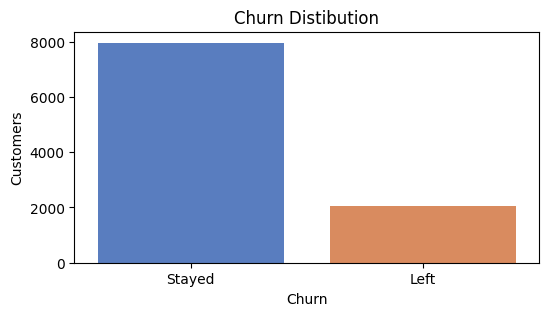

In [ ]:
plt.figure(figsize=(6, 3))
sns.countplot(x='churn', data=df, palette='muted')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.xlabel('Churn')
plt.ylabel('Customers')
plt.title('Churn Distibution')
plt.show()

###Pie Chart

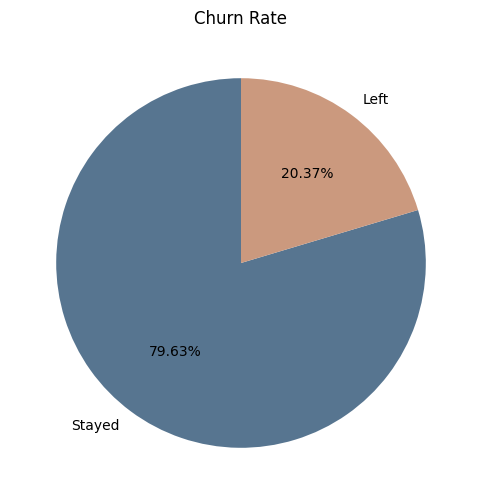

In [ ]:
plt.figure(figsize=(6, 6))
labels = ['Stayed', 'Left']
plt.pie(df['churn'].value_counts(), autopct='%1.2f%%', labels = labels, startangle=90, colors=['#577590', '#cb997e'])
plt.title('Churn Rate')
plt.show()

###Histogram

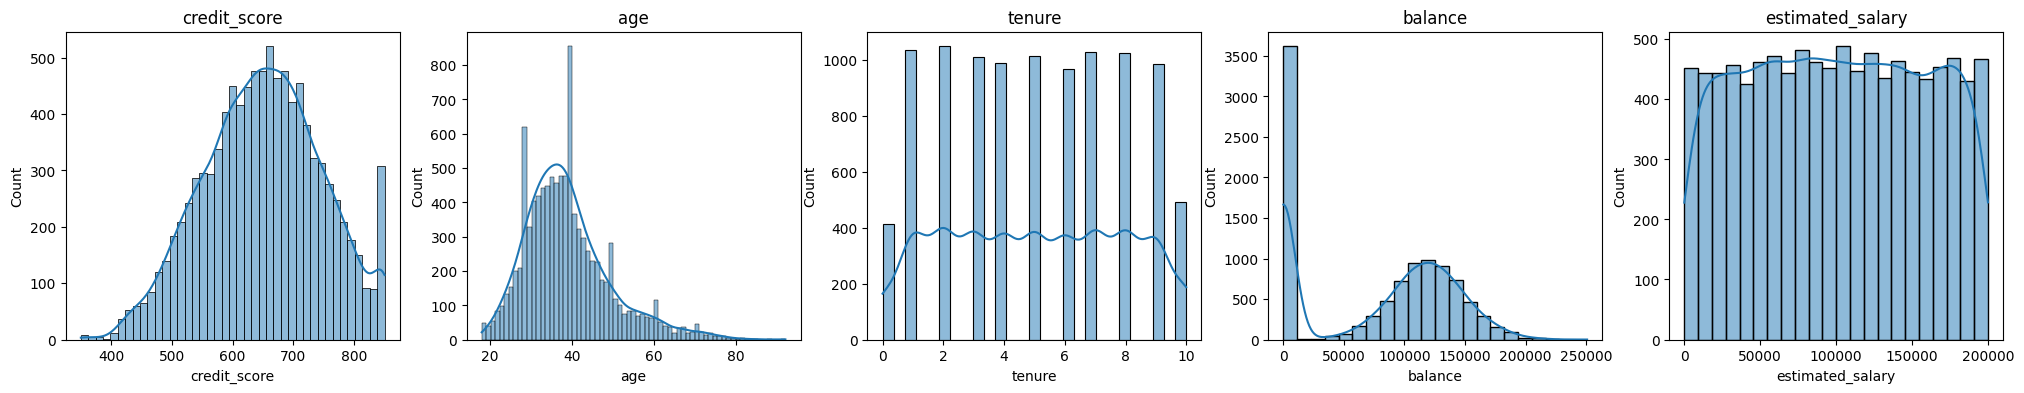

In [ ]:
plt.figure(figsize=(25, 4))
for i, col in enumerate(numCols, 1):
    plt.subplot(1, 5, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col}')
plt.show()

###Countplot

<ipython-input-16-ae85ad71aac5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')
<ipython-input-16-ae85ad71aac5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')
<ipython-input-16-ae85ad71aac5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='muted')
<ipython-input-16-ae85ad71aac5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for

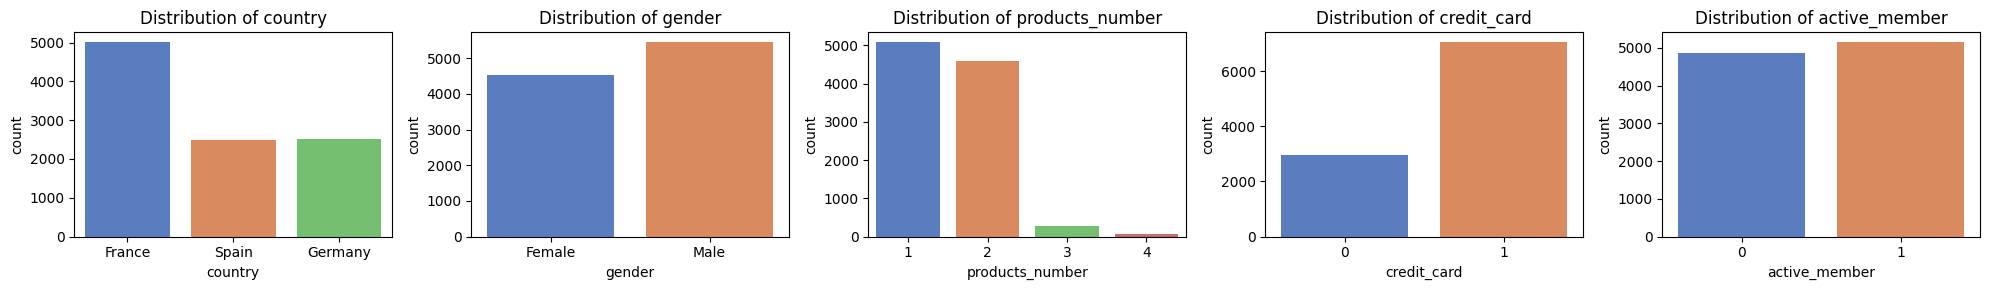

In [ ]:
plt.figure(figsize=(20,3))
for i, col in enumerate(catgCols, 1):
    plt.subplot(1, 5, i)
    sns.countplot(x=col, data=df, palette='muted')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

###Boxplot (by churn)

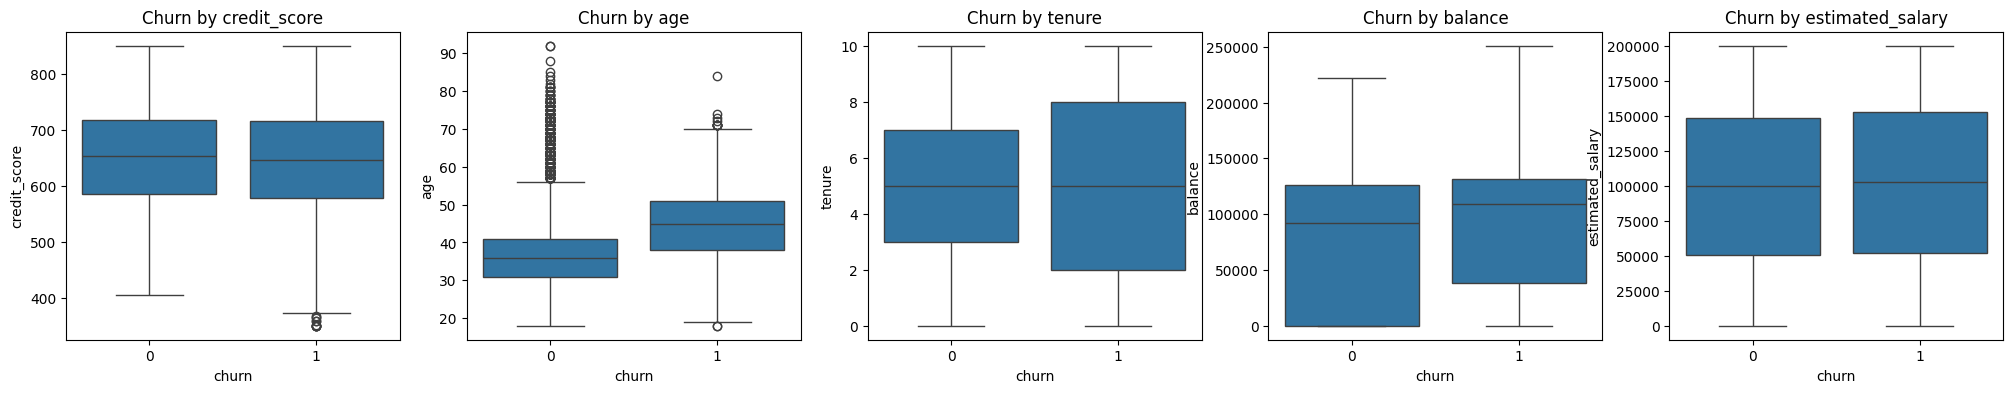

In [ ]:
plt.figure(figsize=(25,4))
for i, col in enumerate(numCols, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(x='churn', y=col, data=df)
    plt.title(f'Churn by {col}')
plt.show()

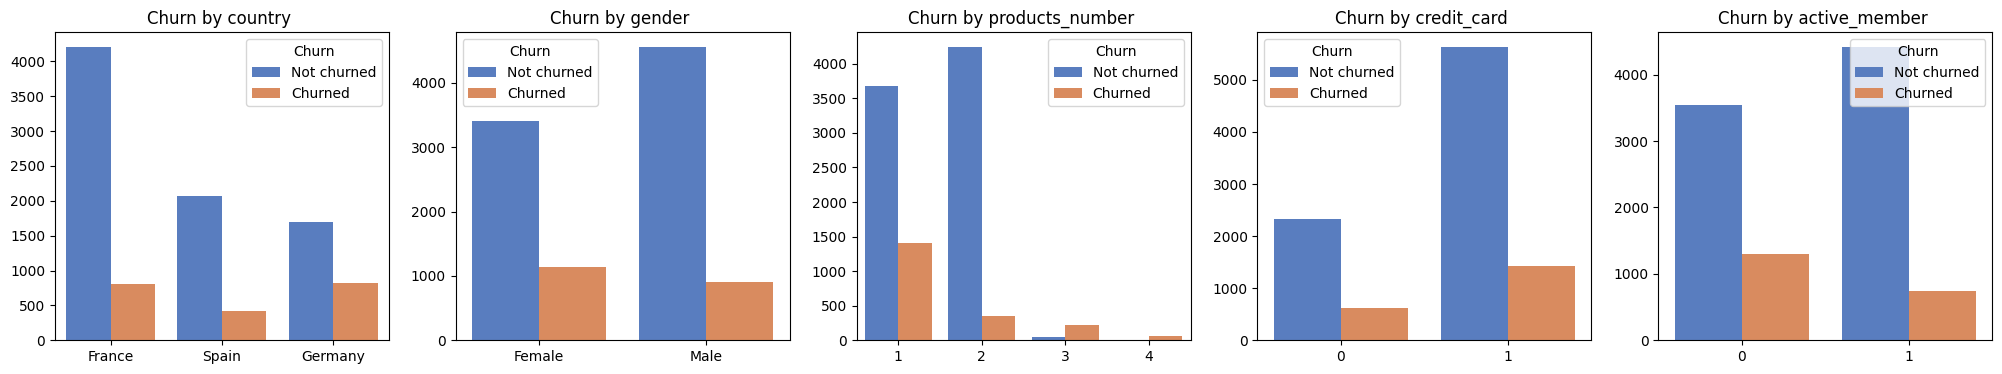

In [ ]:
plt.figure(figsize=(25, 4))
num_cols = len(catgCols)

for i, col in enumerate(catgCols, 1):
    plt.subplot(1, num_cols, i)
    sns.countplot(x=col, hue='churn', data=df, palette='muted')
    plt.title(f'Churn by {col} ')
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(title='Churn', labels=['Not churned', 'Churned'])
plt.show()

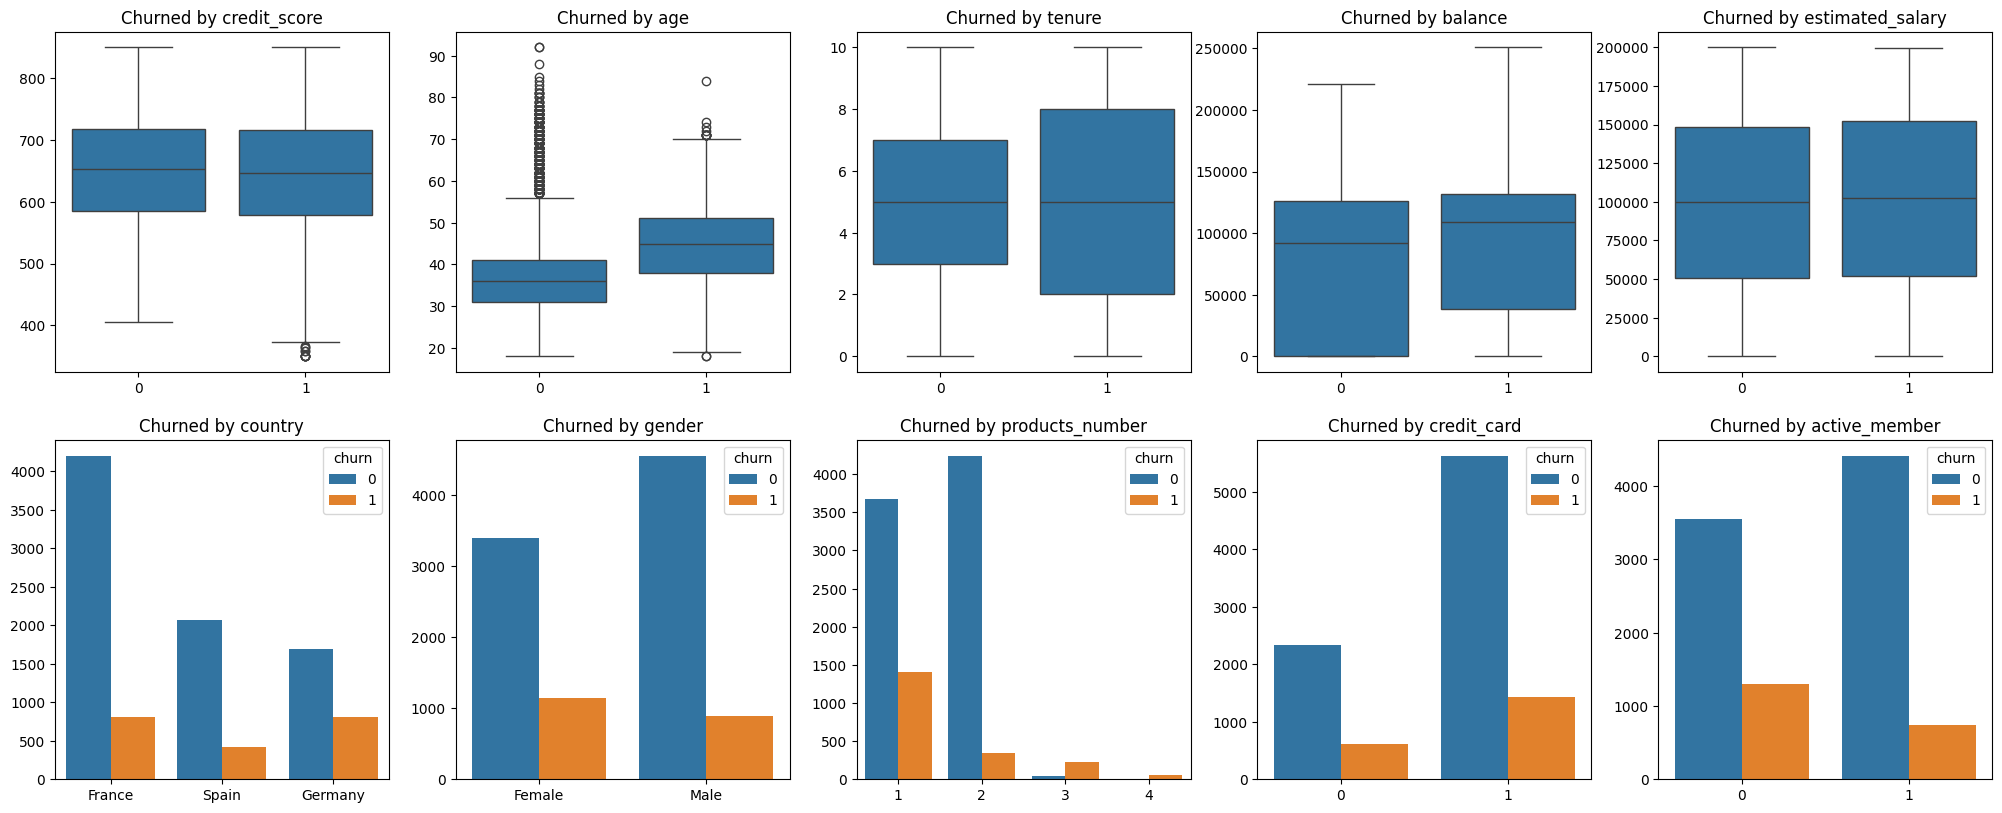

In [ ]:
plt.figure(figsize=(25, 15))

for i, col in enumerate(colsPlot, 1):
    plt.subplot(3, 5, i)

    if col in numCols:
      sns.boxplot(x='churn', y=col, data=df)
      plt.title(f'Churned by {col}')
    else:
        sns.countplot(x=col, hue='churn', data=df)
        plt.title(f'Churned by {col}')
    plt.ylabel('')
    plt.xlabel('')
plt.show()

###Heatmap

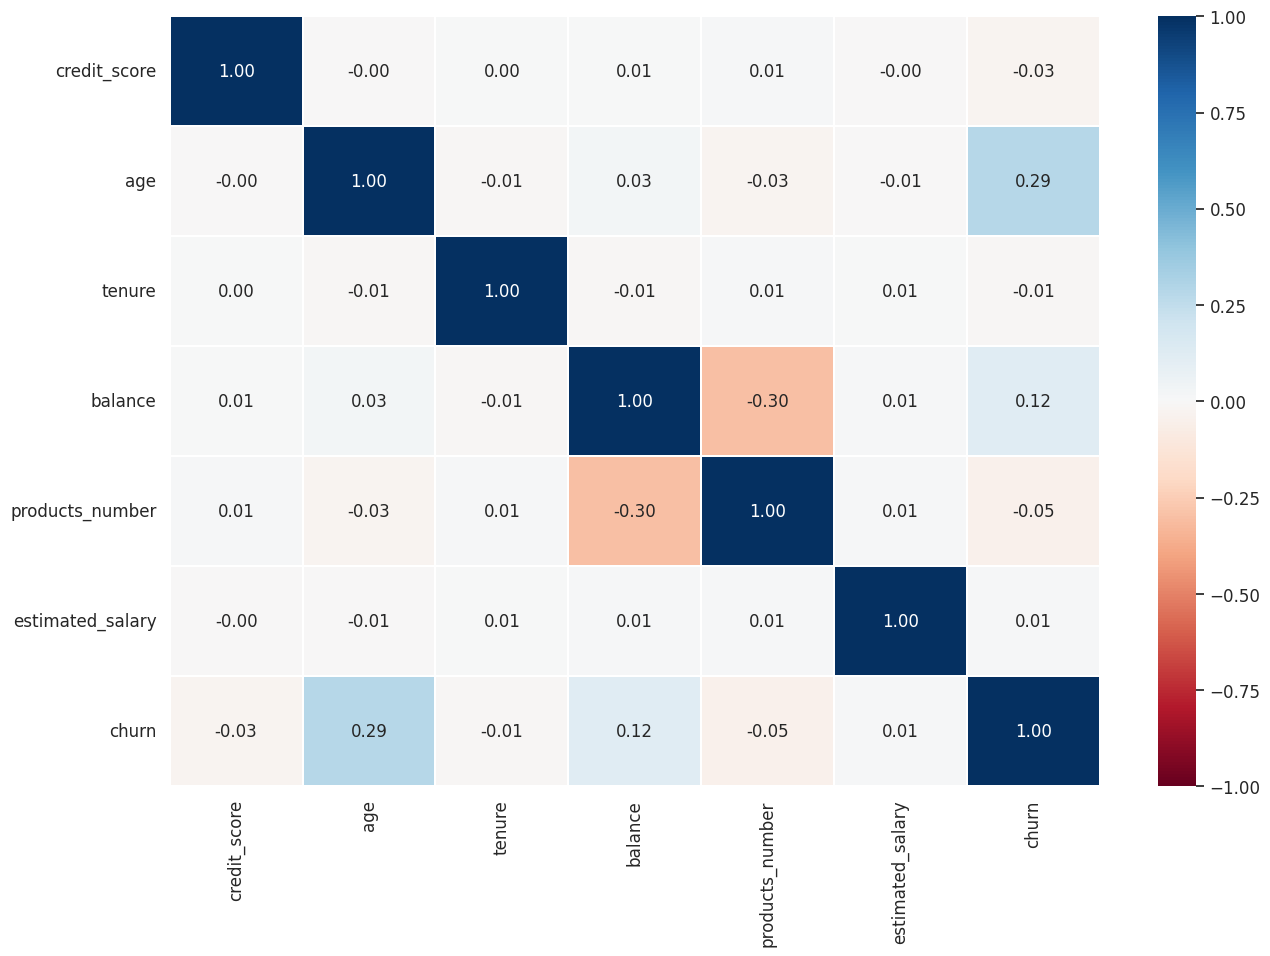

In [ ]:
#correlation matrix
corr = n_df.corr()

#Heatmap
plt.figure(figsize=(15,10))
sns.set(font_scale=1.1)
ax = sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu', vmin=-1, vmax=1, linewidths=1.2, annot_kws={"size":12})
plt.show()

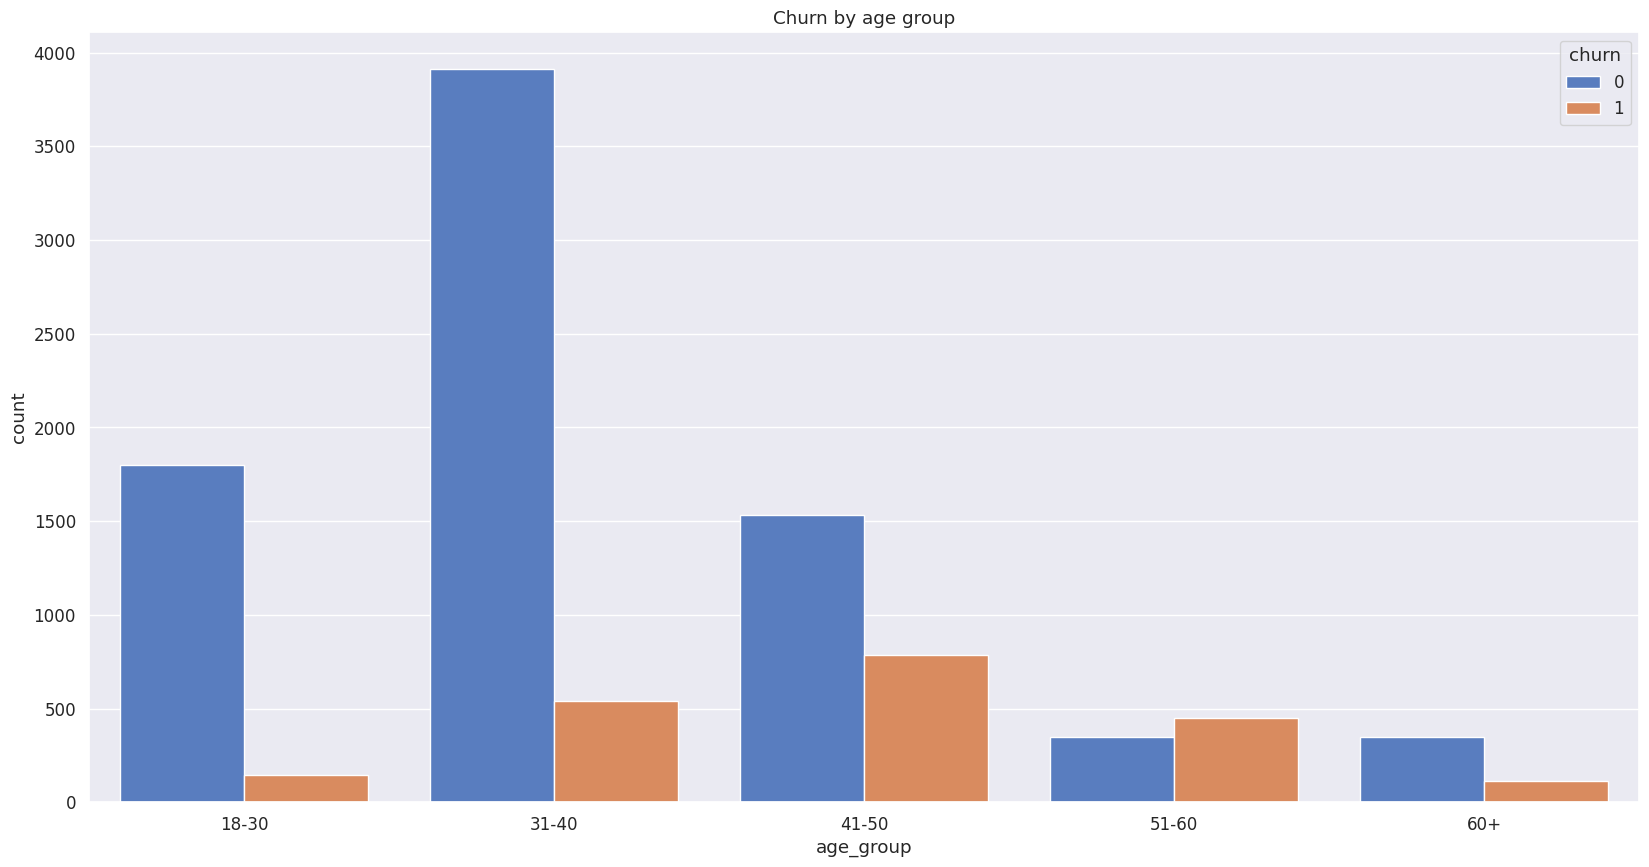

In [ ]:
#Churn by age group
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])
plt.figure(figsize=(20, 10))
sns.countplot(x='age_group', hue='churn', data=df, palette='muted')
plt.title('Churn by age group')
plt.show()

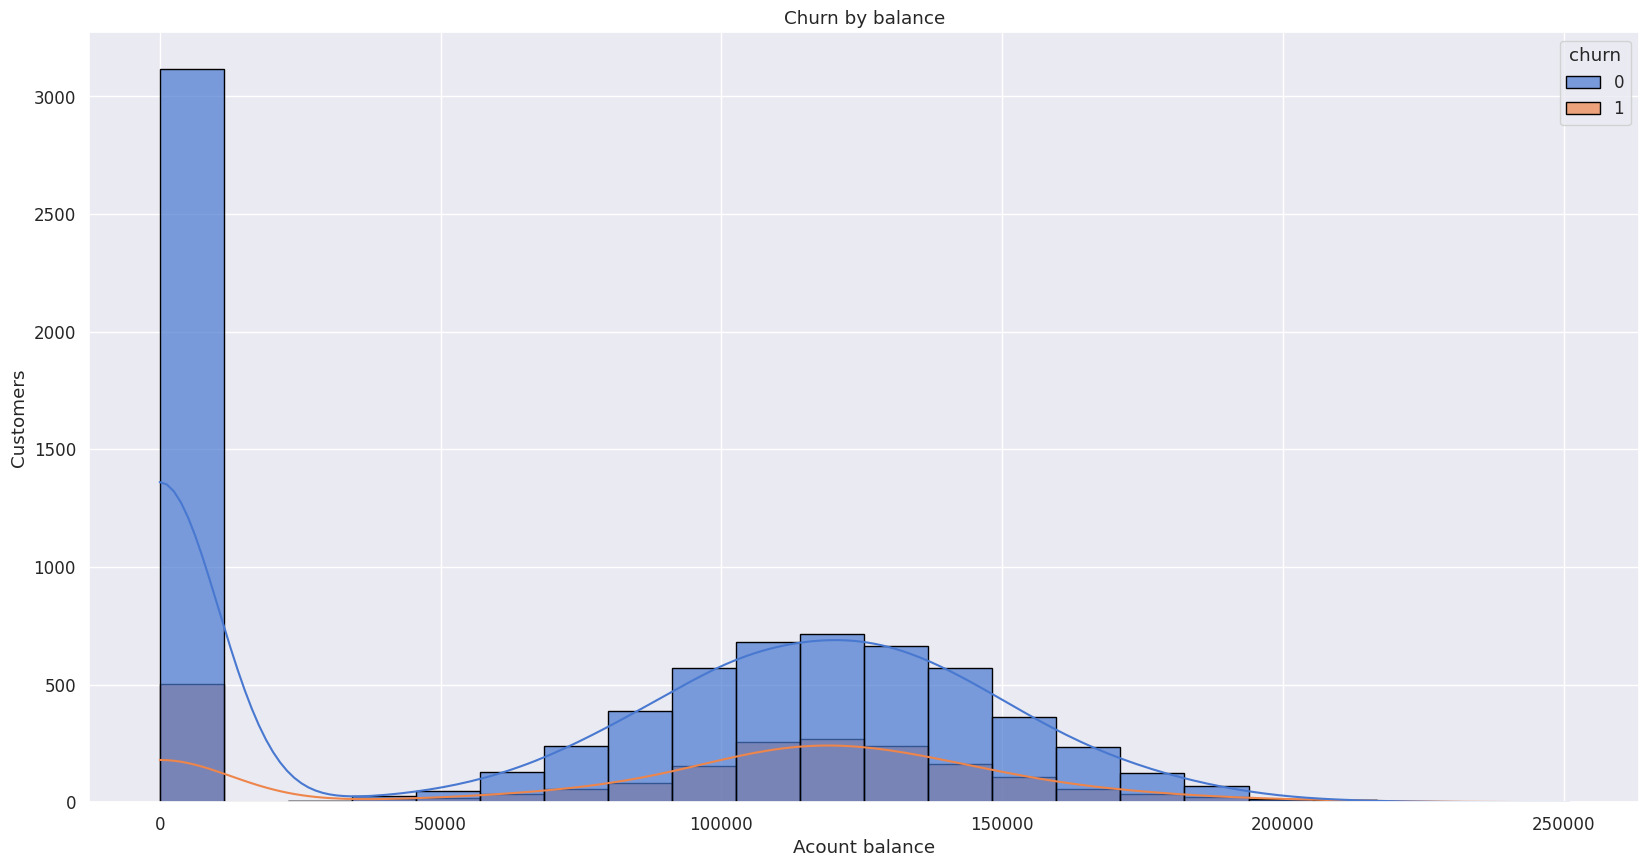

In [ ]:
#Churn by balance
plt.figure(figsize=(20, 10))
sns.histplot(data=df, x='balance', hue='churn', kde=True, palette='muted', edgecolor='black', alpha=0.7)
plt.xlabel('Acount balance')
plt.ylabel('Customers')
plt.title('Churn by balance')
plt.show()

<ipython-input-25-a6be18bf98a2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='churn_percentage', data=country_churn, palette='muted')


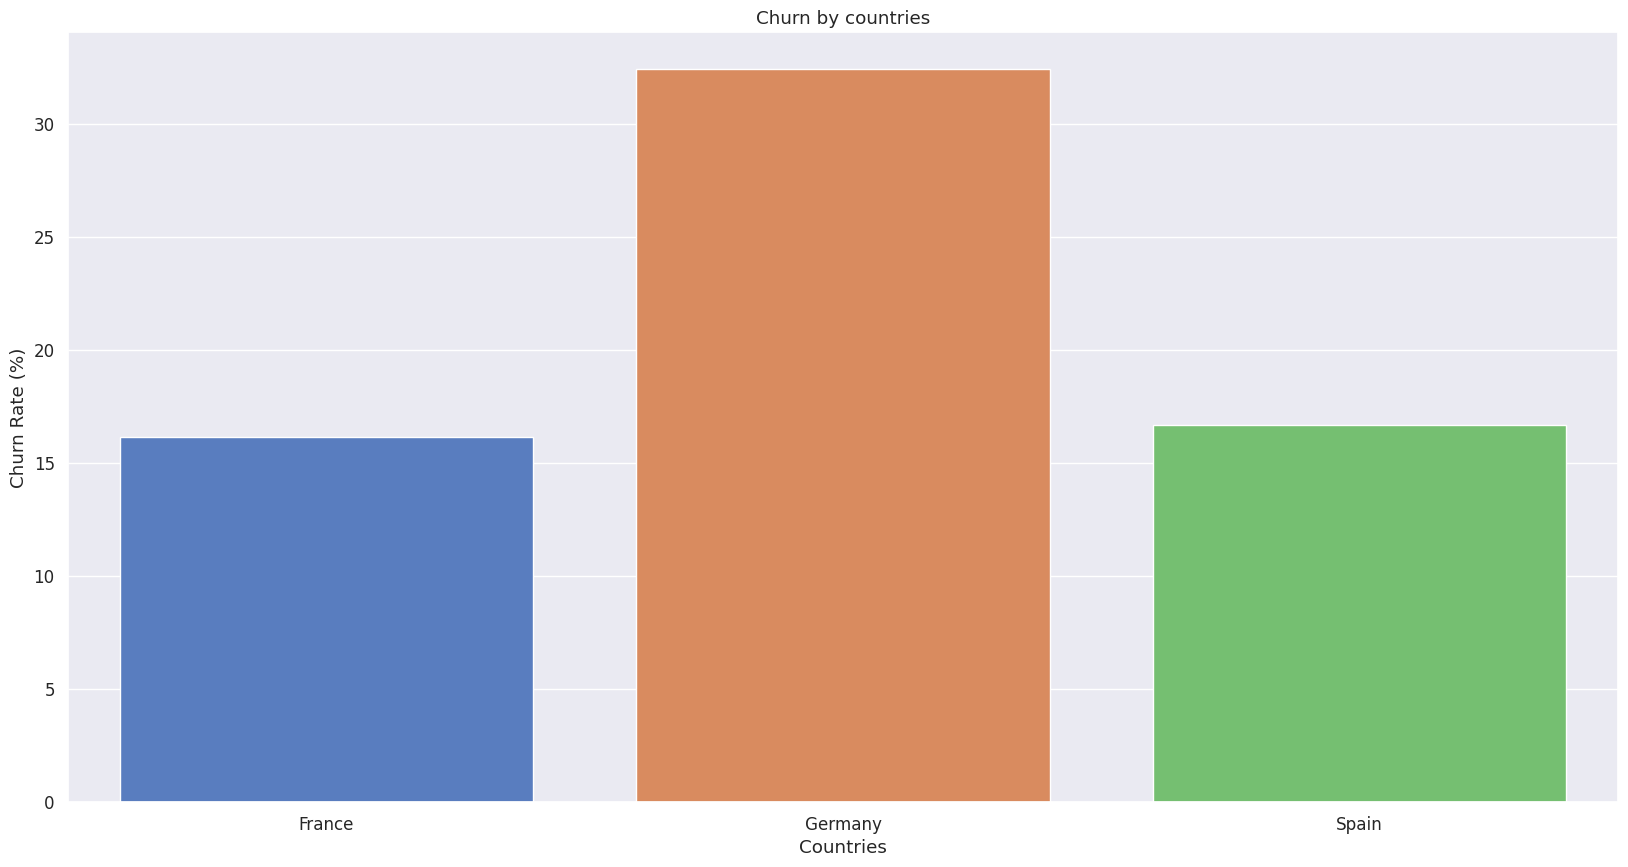

In [ ]:
#Churn by countries
plt.figure(figsize=(20, 10))
country_churn = df.groupby('country')['churn'].mean().reset_index()
country_churn['churn_percentage'] = country_churn['churn'] * 100
sns.barplot(x='country', y='churn_percentage', data=country_churn, palette='muted')
plt.title('Churn by countries')
plt.xlabel('Countries')
plt.ylabel('Churn Rate (%)')
plt.show()

<ipython-input-26-b7f363bf7906>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='churn_percentage', data=gender_churn, palette='muted')


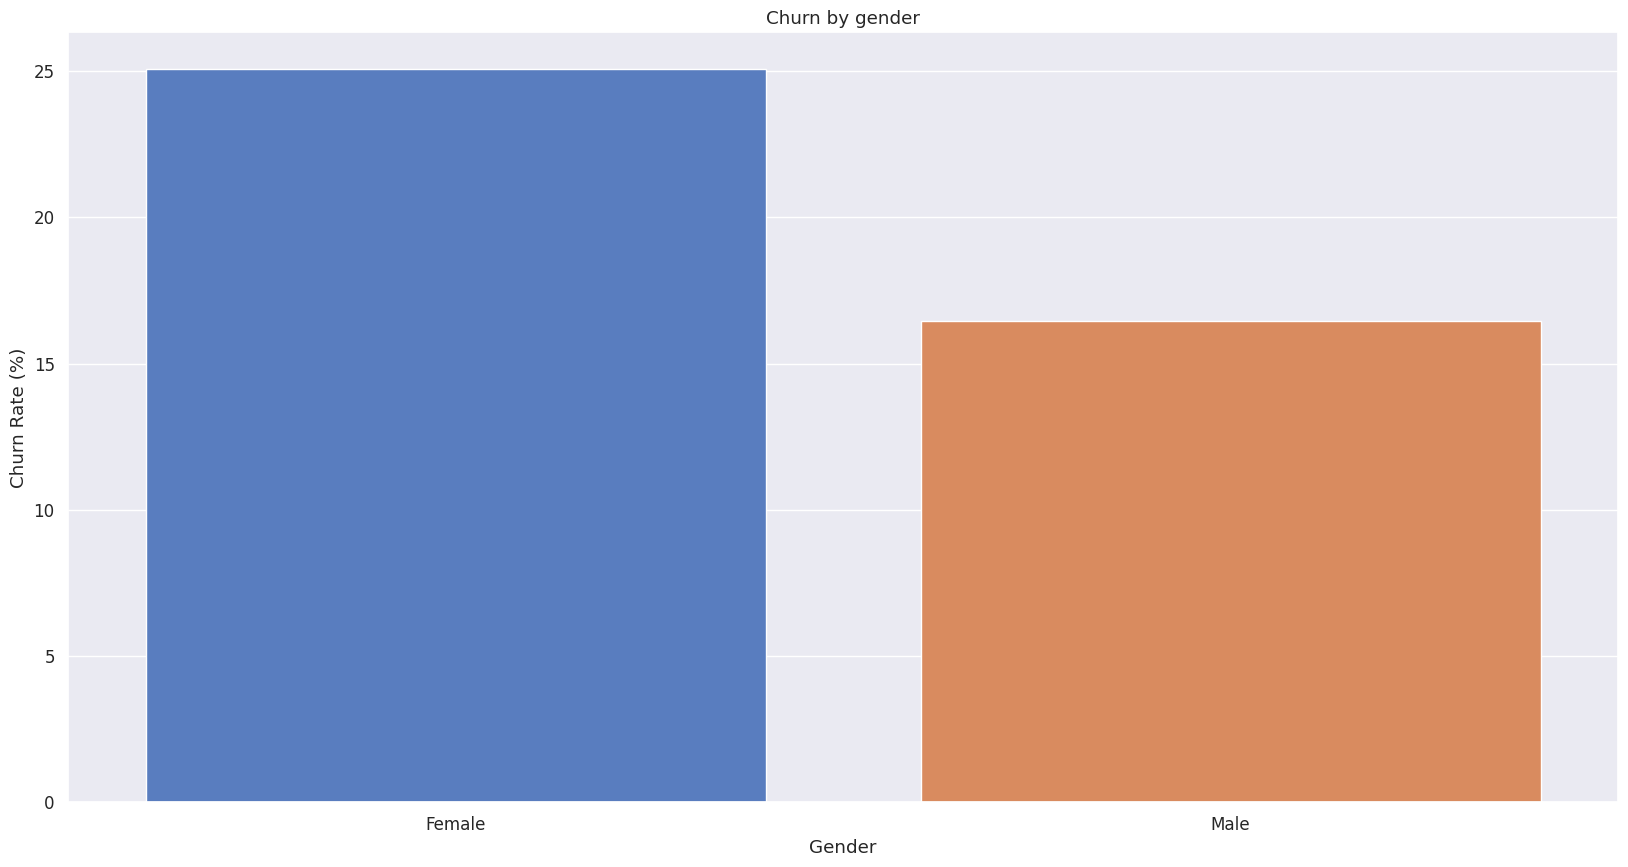

In [ ]:
#Churn by gender
plt.figure(figsize=(20, 10))
gender_churn = df.groupby('gender')['churn'].mean().reset_index()
gender_churn['churn_percentage'] = gender_churn['churn'] * 100
sns.barplot(x='gender', y='churn_percentage', data=gender_churn, palette='muted')
plt.title('Churn by gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate (%)')
plt.show()

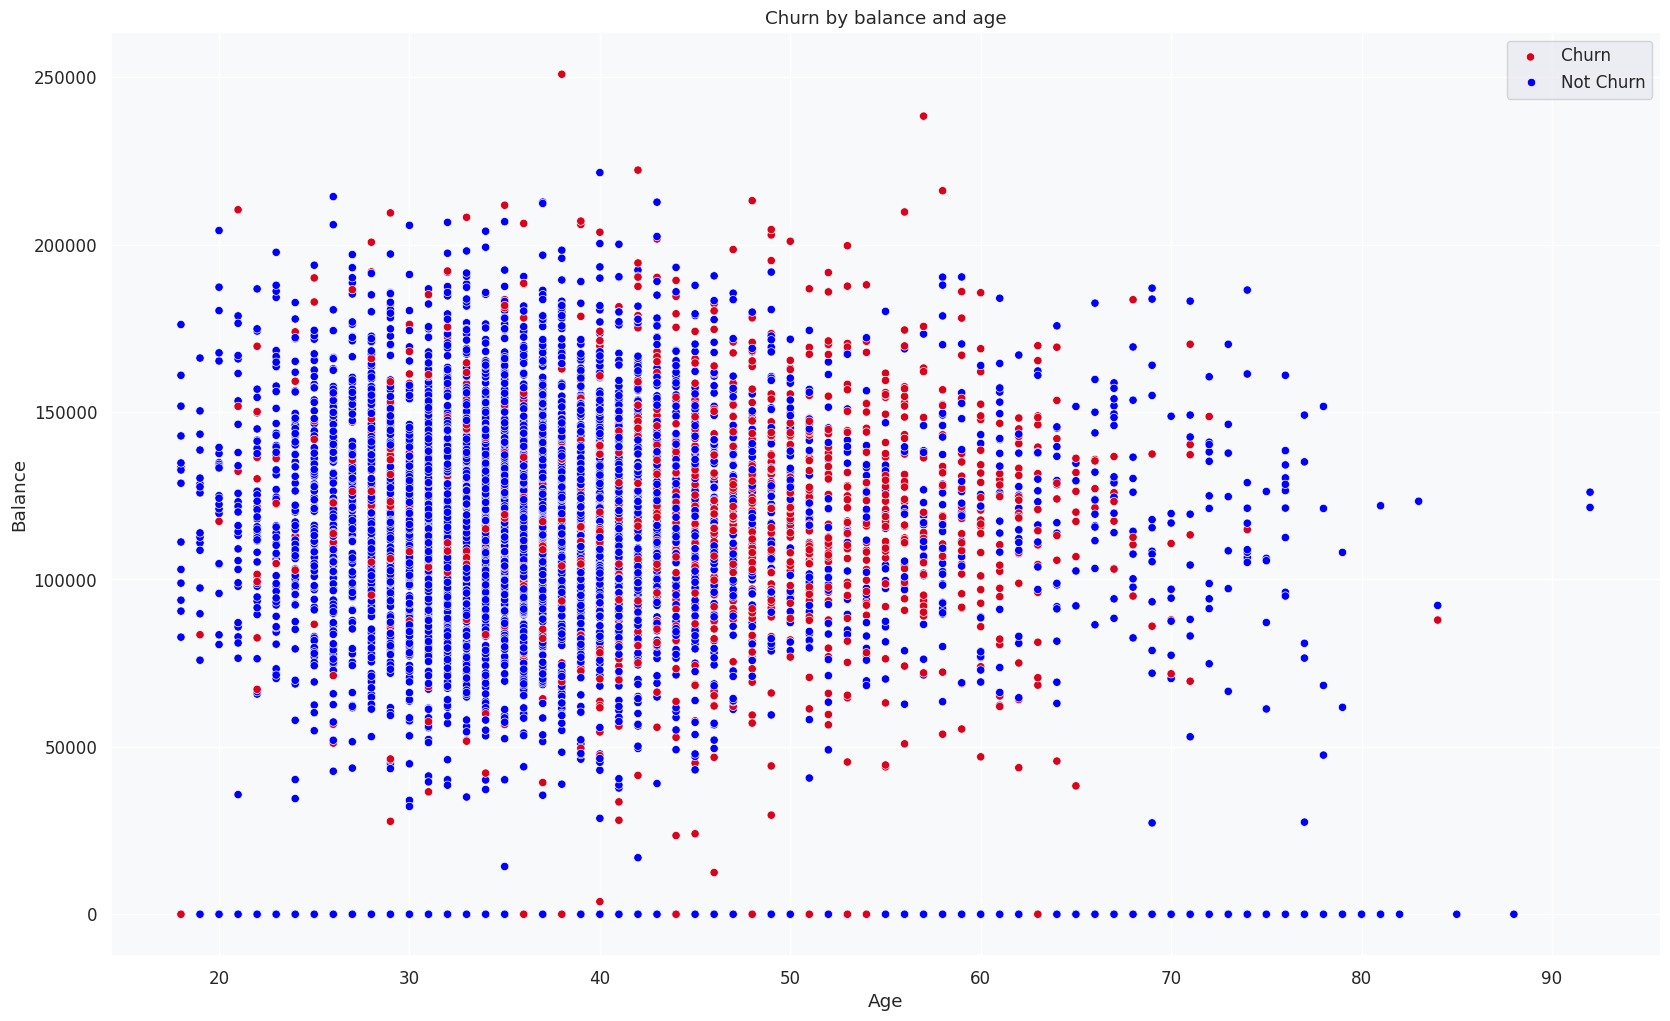

In [ ]:
# Churn by balance and age
plt.figure(figsize=(20, 12))

sns.scatterplot(x='age', y='balance', hue='churn', data=df, palette=['#0000ff', '#d8031c'])
plt.title('Churn by balance and age')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend(labels=['Churn', 'Not Churn'])
plt.grid(True)
plt.gca().set_facecolor('#f8f9fa')
plt.show()

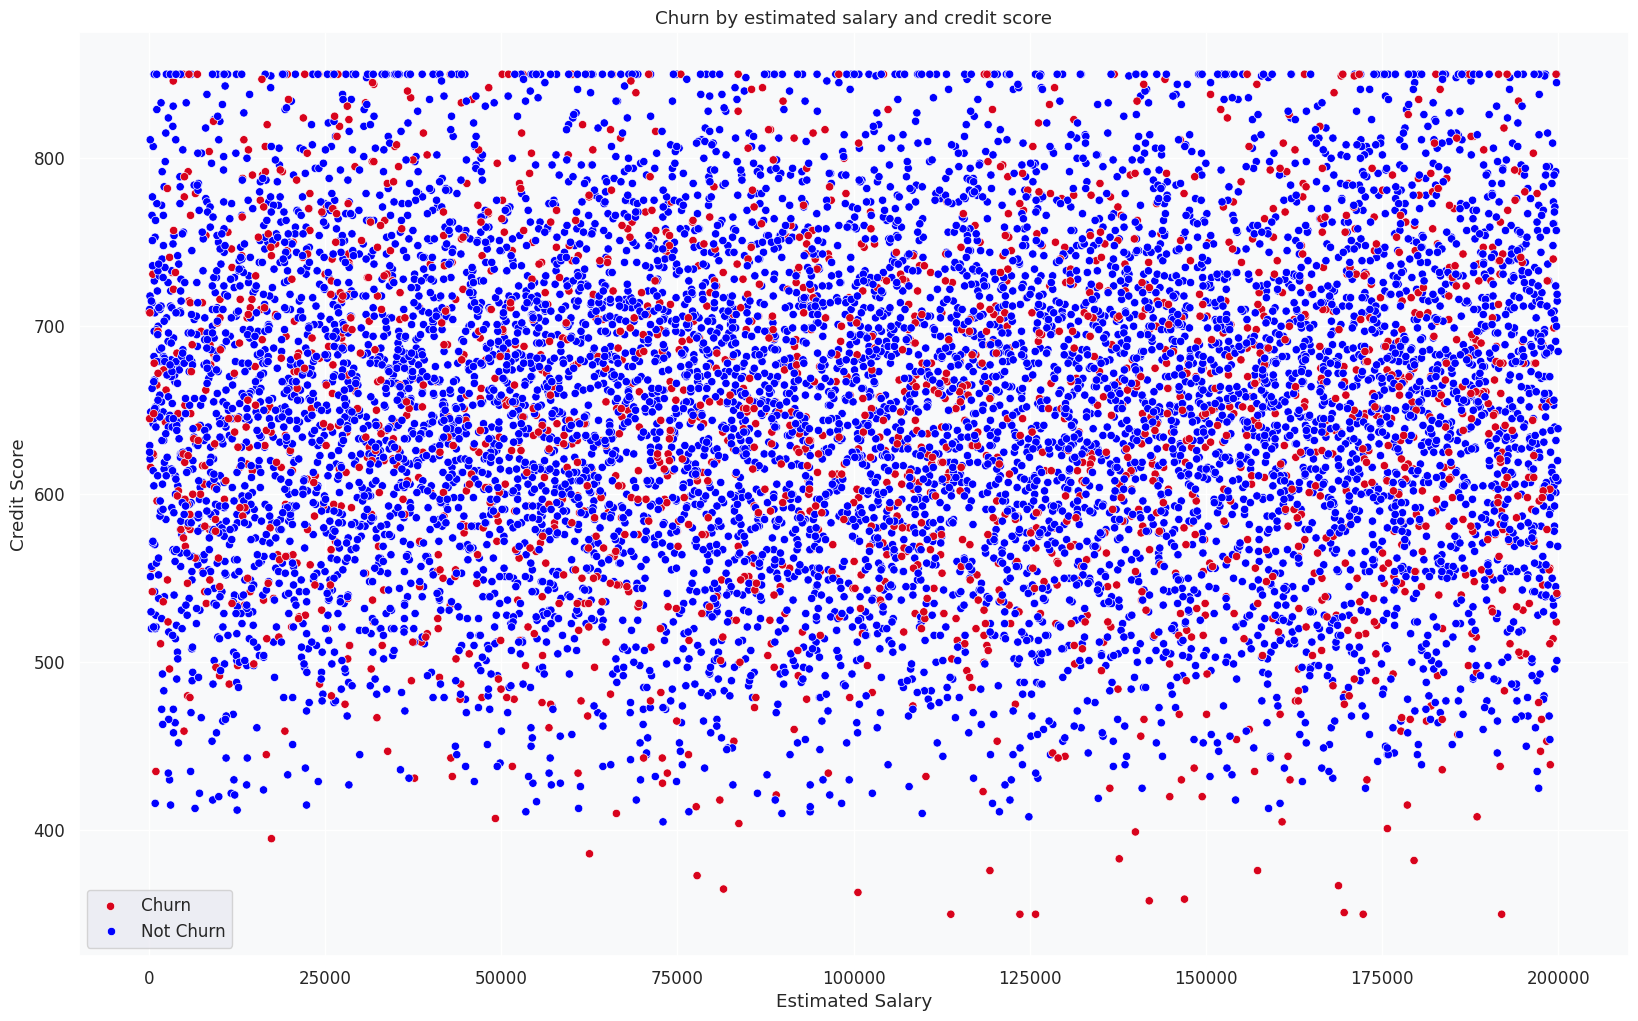

In [ ]:
# Churn by estimated salary and credit score
plt.figure(figsize=(20, 12))

sns.scatterplot(x='estimated_salary', y='credit_score', hue='churn', data=df, palette=['#0000ff', '#d8031c'])

plt.title('Churn by estimated salary and credit score')
plt.xlabel('Estimated Salary')
plt.ylabel('Credit Score')
plt.legend(labels=['Churn', 'Not Churn'])
plt.gca().set_facecolor('#f8f9fa')
plt.show()

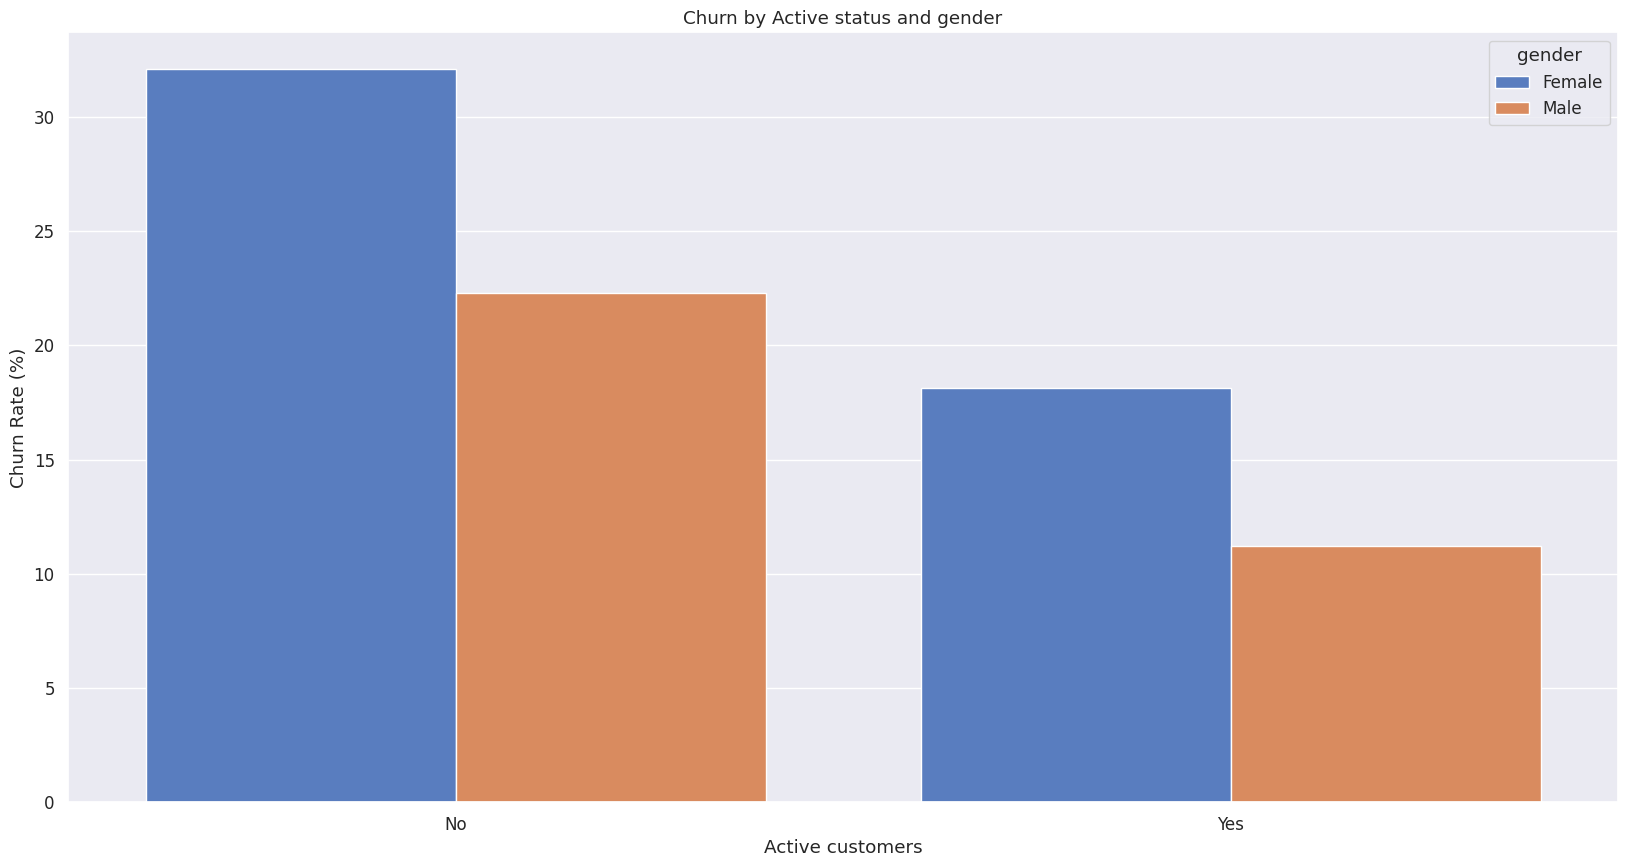

In [ ]:
# Churn by active status and gender
plt.figure(figsize=(20, 10))
active_churn = df.groupby(['active_member', 'gender'])['churn'].mean().reset_index()
active_churn['churn_percentage'] = active_churn['churn'] * 100
plt.xticks([0, 1], ['No', 'Yes'])
sns.barplot(x='active_member', y='churn_percentage', hue='gender', data=active_churn, palette='muted')
plt.title('Churn by Active status and gender')
plt.xlabel('Active customers')
plt.ylabel('Churn Rate (%)')
plt.show()

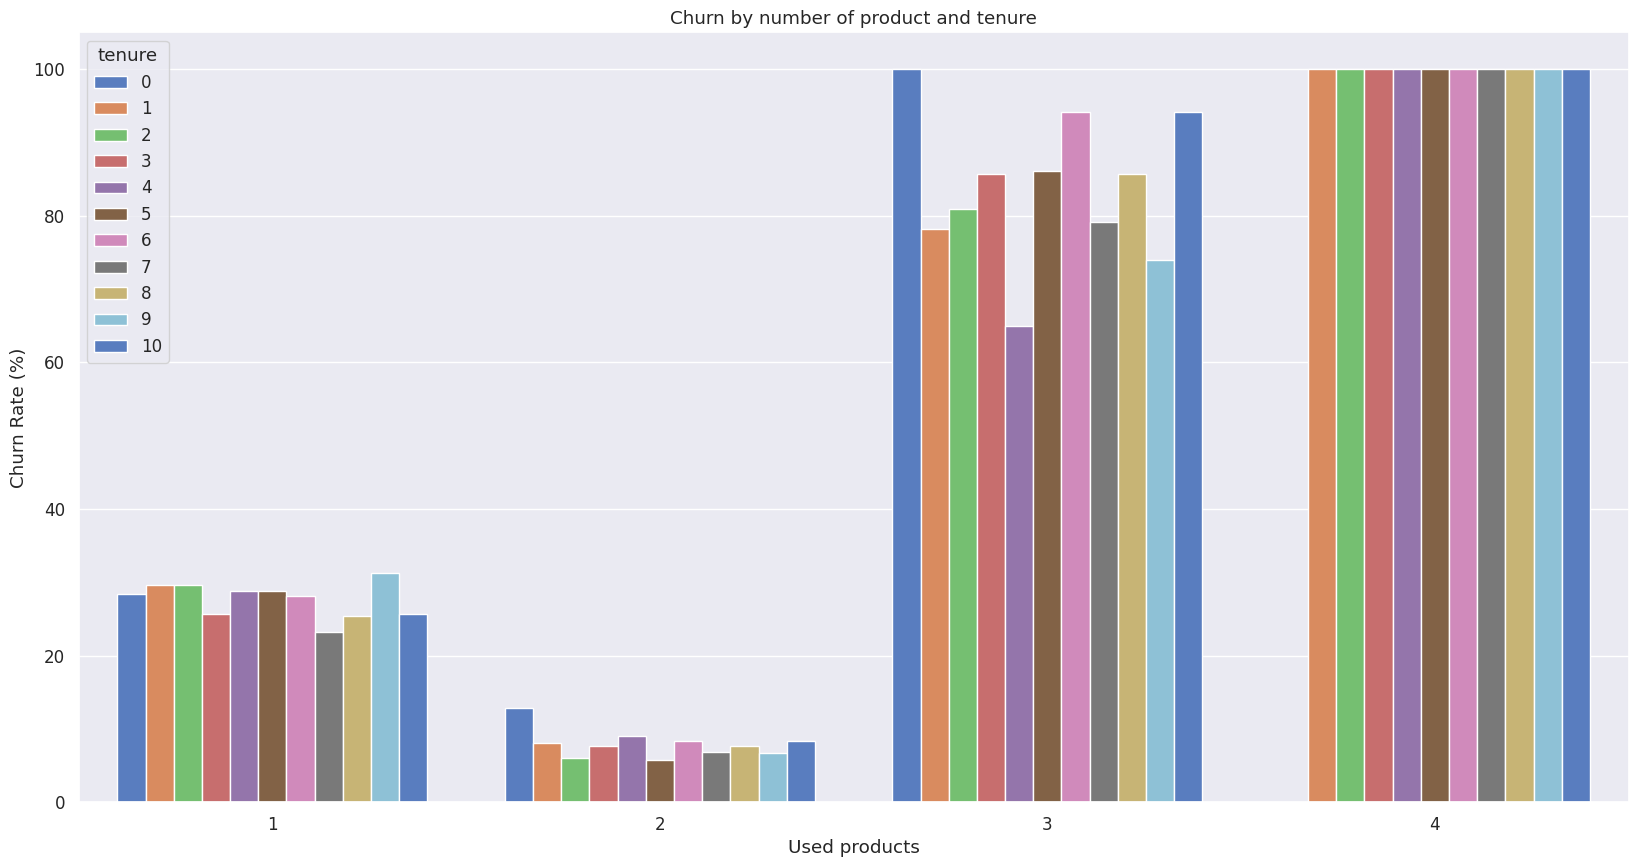

In [ ]:
#Churn by number of product and tenure
plt.figure(figsize=(20,10))
product_churn = df.groupby(['products_number', 'tenure'])['churn'].mean().reset_index()
product_churn['churn_percentage'] = product_churn['churn'] * 100
sns.barplot(x='products_number', y='churn_percentage', hue='tenure', data=product_churn, palette='muted')
plt.title('Churn by number of product and tenure')
plt.xlabel('Used products')
plt.ylabel('Churn Rate (%)')
plt.show()

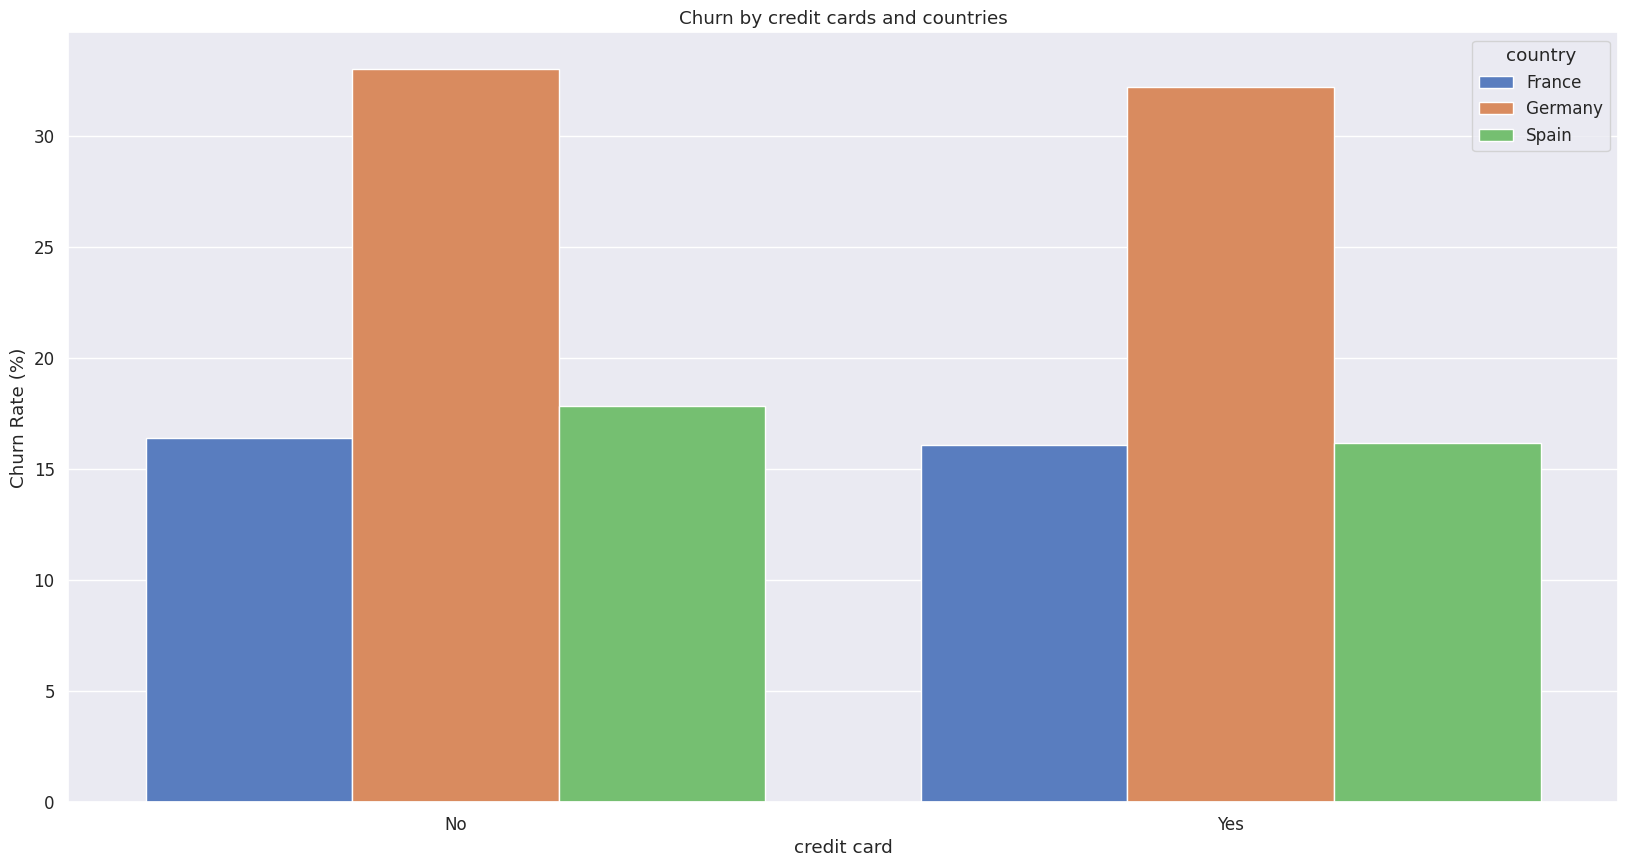

In [ ]:
#Churn by credit cards and countries
plt.figure(figsize=(20, 10))
credit_churn = df.groupby(['credit_card', 'country'])['churn'].mean().reset_index()
credit_churn['churn_percentage'] = credit_churn['churn'] * 100
sns.barplot(x='credit_card', y='churn_percentage', hue='country', data=credit_churn, palette='muted')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Churn by credit cards and countries')
plt.xlabel('credit card')
plt.ylabel('Churn Rate (%)')
plt.show()

#Model Prediction

In [ ]:
X = df.drop(columns=['customer_Id', 'churn'], errors='ignore')
y = df['churn']

In [ ]:
#Preprocessing
numCols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
catCols = X.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numCols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), catCols)
    ]
)

X_processed = preprocessor.fit_transform(X)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train_procs = preprocessor.fit_transform(X_train)
X_test_procs = preprocessor.transform(X_test)

In [ ]:
# Balance the training set
smote = SMOTE(random_state=42)
X_train_balc, y_train_balc = smote.fit_resample(X_train_procs, y_train)

In [ ]:
# Define hyperparameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

In [ ]:
# Initialize SVM classifier
svm = SVC(probability=True, random_state=0)

In [ ]:
# Grid search w/ cross-validation
gs_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='f1', n_jobs=-1)

In [ ]:
# Fit model on balanced training set
gs_svm.fit(X_train_balc, y_train_balc)

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=0), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'class_weight': [None, 'balanced'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly']},
             scoring='f1')

In [ ]:
# Retrieve best model and make predictions
best_svm_model = gs_svm.best_estimator_
y_pred_svm = best_svm_model.predict(X_test_procs)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1593
           1       0.50      0.61      0.55       407

    accuracy                           0.80      2000
   macro avg       0.70      0.73      0.71      2000
weighted avg       0.81      0.80      0.80      2000



In [ ]:
# Define hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

In [ ]:
# Initialize Gradient Boosting classifier
gb = GradientBoostingClassifier(random_state=0)

In [ ]:
# GridSearchCV with cross-validation
gs_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='f1', n_jobs=-1)

In [ ]:
# Fit model on balanced training data
gs_gb.fit(X_train_balc, y_train_balc)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [17]:
# Get best estimator and make predictions
best_gb_model = gs_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test_procs)

# Evaluation metrics
print(classification_report(y_test, y_pred_gb))

NameError: name 'gs_gb' is not defined

In [ ]:
# Predict test set
y_pred_svm = gs_svm.best_estimator_.predict(X_test_procs)
y_pred_gb = gs_gb.best_estimator_.predict(X_test_procs)

# Compute metrics for SVM
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# Compute metrics for Gradient Boosting
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)

#Results
print("\nModel Evaluation Metrics\n" + "-" * 35)
print("{:<12} {:<10} {:<15}".format("Metric", "SVM", "Gradient Boost"))
print("-" * 35)
print("{:<12} {:<10.3f} {:<15.3f}".format("Precision", svm_precision, gb_precision))
print("{:<12} {:<10.3f} {:<15.3f}".format("Recall", svm_recall, gb_recall))
print("{:<12} {:<10.3f} {:<15.3f}".format("F1-score", svm_f1, gb_f1))


Model Evaluation Metrics
-----------------------------------
Metric       SVM        Gradient Boost 
-----------------------------------
Precision    0.501      0.701          
Recall       0.612      0.548          
F1-score     0.551      0.615          
